In [1]:
source("/path/to/the/project/02_notebooks/00_setup.r")

In [18]:
p_load("ggplot2", "dplyr", "ggpubr", "ggbreak", "gee", "ggeffects", install = FALSE)

Warning message in p_load("ggplot2", "dplyr", "ggpubr", "ggbreak", "gee", "ggeffects", :
"Failed to install/load:
gee, ggeffects"


In [3]:
metadata <- read.csv("2022_08_12_CDL_regression_sample_annotation.csv", row.names = 1)

In [4]:
ggplotRegression_ccl4 <- function (fit) {
ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1], color = names(fit$model)[2])) + 
  geom_point(shape = 16, size = 5, alpha = 0.8, show.legend = FALSE) +
  stat_smooth(method = "lm", col = "#5e2dbb") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5))) +
                     theme_minimal() +
  scale_color_gradient(low = "#708090", high = "#063852")
}

ggplotRegression_taa <- function (fit) {
ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1], color = names(fit$model)[2])) + 
  geom_point(shape = 16, size = 5, alpha = 0.8, show.legend = FALSE) +
  stat_smooth(method = "lm", col = "#5e2dbb") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5))) +
                     theme_minimal() +
  scale_color_gradient(low = "#708090", high = "#F0810F")
}

## Plots

In [5]:
metadata$PP <- as.numeric(metadata$PP)
metadata$CPA <- as.numeric(metadata$CPA)
metadata$ALT <- as.numeric(metadata$ALT)
metadata$AST <- as.numeric(metadata$AST)

In [6]:
metadata$Group <- metadata$Group %>% forcats::fct_relevel("Cneg", "Cpos", "R1", "R2")

In [7]:
group_cols <- c("#dc97b3", "#da4370", "#57b09c", "#55dfa7")

In [8]:
group_comparisons <- list(c("CCL4_Cneg", "TAA_Cneg"), 
                        c("CCL4_Cpos", "TAA_Cpos"), 
                        c("CCL4_R1", "TAA_R1"),
                        c("CCL4_R2", "TAA_R2"))

In [10]:
# stat.test <- metadata %>%
#   group_by(Group, Model) %>%
#   t_test(len ~ supp) %>%
#   adjust_pvalue() %>%
#   mutate(y.position = 35)
# stat.test

In [11]:
pp_data <- metadata %>%                           # Get mean & standard deviation by group
  group_by(Group, Model) %>%
  summarise_at(vars(PP),
               list(mean = mean,
                    sd = sd)) %>% 
  as.data.frame() %>%
  mutate(se = sd / sqrt(nrow(.)))
pp_data$merged <- paste0(pp_data$Model, "_", pp_data$Group)
pp_data

Group,Model,mean,sd,se,merged
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Cneg,CCL4,5.010000,0.4632926,0.1637987,CCL4_Cneg
Cneg,TAA,5.466667,0.4778563,0.1689477,TAA_Cneg
Cpos,CCL4,10.478333,0.8472406,0.2995448,CCL4_Cpos
Cpos,TAA,7.571667,0.5810479,0.2054315,TAA_Cpos
R1,CCL4,8.320000,0.8588830,0.3036610,CCL4_R1
R1,TAA,7.246667,0.5066228,0.1791182,TAA_R1
R2,CCL4,8.251667,0.6976938,0.2466720,CCL4_R2
R2,TAA,5.998333,0.5948585,0.2103142,TAA_R2


In [10]:
cpa_data <- metadata %>%                           # Get mean & standard deviation by group
  group_by(Group, Model) %>%
  summarise_at(vars(CPA),
               list(mean = mean,
                    sd = sd)) %>% 
  as.data.frame() %>%
  mutate(se = sd / sqrt(nrow(.)))
cpa_data$merged <- paste0(cpa_data$Model, "_", cpa_data$Group)
cpa_data

Group,Model,mean,sd,se,merged
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Cneg,CCL4,0.9766667,0.3511505,0.12415045,CCL4_Cneg
Cneg,TAA,0.7750000,0.1044509,0.03692899,TAA_Cneg
Cpos,CCL4,17.3616667,4.4999974,1.59098934,CCL4_Cpos
Cpos,TAA,4.0000000,0.3064637,0.10835128,TAA_Cpos
R1,CCL4,11.3750000,3.0801023,1.08898060,CCL4_R1
R1,TAA,3.2216667,0.4699539,0.16615379,TAA_R1
R2,CCL4,5.4116667,1.5738541,0.55644145,CCL4_R2
R2,TAA,2.7766667,0.2429540,0.08589723,TAA_R2


In [12]:
alt_data <- metadata %>%                           # Get mean & standard deviation by group
  group_by(Group, Model) %>%
  summarise_at(vars(ALT),
               list(mean = mean,
                    sd = sd)) %>% 
  as.data.frame() %>%
  mutate(se = sd / sqrt(nrow(.)))
alt_data$merged <- paste0(alt_data$Model, "_", alt_data$Group)
alt_data

Group,Model,mean,sd,se,merged
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Cneg,CCL4,19.333333,8.547904,3.0221405,CCL4_Cneg
Cneg,TAA,3.833333,1.169045,0.4133199,TAA_Cneg
Cpos,CCL4,3764.666667,2764.533571,977.4102175,CCL4_Cpos
Cpos,TAA,47.166667,11.856081,4.1917578,TAA_Cpos
R1,CCL4,34.666667,3.265986,1.1547005,CCL4_R1
R1,TAA,12.000000,6.260990,2.2135944,TAA_R1
R2,CCL4,35.333333,4.676181,1.6532796,CCL4_R2
R2,TAA,5.000000,1.788854,0.6324555,TAA_R2


In [13]:
ast_data <- metadata %>%                           # Get mean & standard deviation by group
  group_by(Group, Model) %>%
  summarise_at(vars(AST),
               list(mean = mean,
                    sd = sd)) %>% 
  as.data.frame() %>%
  mutate(se = sd / sqrt(nrow(.)))
ast_data$merged <- paste0(ast_data$Model, "_", ast_data$Group)
ast_data

Group,Model,mean,sd,se,merged
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Cneg,CCL4,44.666667,16.669333,5.8934992,CCL4_Cneg
Cneg,TAA,9.166667,3.188521,1.1273124,TAA_Cneg
Cpos,CCL4,3130.000000,2612.943474,923.8150248,CCL4_Cpos
Cpos,TAA,32.833333,6.306082,2.2295366,TAA_Cpos
R1,CCL4,72.666667,33.696686,11.9135777,CCL4_R1
R1,TAA,11.666667,2.943920,1.0408330,TAA_R1
R2,CCL4,53.333333,6.022181,2.1291626,CCL4_R2
R2,TAA,9.333333,1.032796,0.3651484,TAA_R2


In [14]:
pp_bar <- pp_data %>%
  ggplot(aes(x=Group, y=mean, fill=Model)) + 
  geom_bar(stat='identity', position= "dodge") +
  geom_errorbar(aes(ymin = mean, ymax=mean+se), position=position_dodge(width=0.9), color = "#000000") +
  # stat_compare_means(aes(group=merged),method = "wilcox.test", label = "p.signif") +
        # ggpubr::geom_pwc(aes(group = Group), method = "t.test") +
                       theme(plot.title = element_text(hjust = 0.5, size=7),
        axis.text.x = element_text(size=10,angle = 45,hjust=1),
        axis.text.y = element_text(size=10),
        axis.title.x = element_text(size=10),
        axis.title.y = element_text(size=10),
        axis.line = element_line(colour = "black"),
        strip.text.x = element_text(size = 12),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        legend.position = 'none') +
        coord_cartesian(ylim = c(4, 12)) +
        scale_fill_manual(values = c('#063852', '#F0810F')) +
        theme(axis.title.x = element_blank(), axis.text.x=element_blank(), axis.title.y = element_blank())


In [15]:
cpa_bar <- cpa_data %>%
  ggplot(aes(x=Group, y=mean, fill=Model)) + 
  geom_bar(stat='identity', position= "dodge") +
  geom_errorbar(aes(ymin = mean, ymax=mean+se), position=position_dodge(width=0.9), color = "#000000") +
#   stat_compare_means(aes(group=merged),method = "wilcox.test", label = "p.signif", 
#                      comparisons = group_comparisons) +
        # ggpubr::geom_pwc(aes(group = Group), method = "t.test") +
                       theme(plot.title = element_text(hjust = 0.5, size=7),
        axis.text.x = element_text(size=10,angle = 45,hjust=1),
        axis.text.y = element_text(size=10),
        axis.title.x = element_text(size=10),
        axis.title.y = element_text(size=10),
        axis.line = element_line(colour = "black"),
        strip.text.x = element_text(size = 12),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        legend.position = 'none') +
        scale_y_continuous(expand = c(0,0)) +
        scale_fill_manual(values = c('#063852', '#F0810F')) +
        theme(axis.title.x = element_blank(), axis.text.x=element_blank(), axis.title.y = element_blank())

In [19]:
alt_bar <- alt_data %>%
  ggplot(aes(x=Group, y=mean, fill=Model)) + 
  geom_bar(stat='identity', position= "dodge") +
  geom_errorbar(aes(ymin = mean, ymax=mean+se), position=position_dodge(width=0.9), color = "#000000") +
#   stat_compare_means(aes(group=merged),method = "wilcox.test", label = "p.signif", 
#                      comparisons = group_comparisons) +
        # ggpubr::geom_pwc(aes(group = Group), method = "t.test") +
                       theme(plot.title = element_text(hjust = 0.5, size=7),
        axis.text.x = element_text(size=10,angle = 45,hjust=1),
        axis.text.y = element_text(size=10),
        axis.title.x = element_text(size=10),
        axis.title.y = element_text(size=10),
        axis.line = element_line(colour = "black"),
        strip.text.x = element_text(size = 12),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        legend.position = 'none') +
        scale_y_break(c(60, 3200), scales = 0.75, space = 0.5, expand = c(0,0)) +

        scale_fill_manual(values = c('#063852', '#F0810F')) +
        theme(axis.title.x = element_blank(), axis.text.x=element_blank(), axis.title.y = element_blank())


In [20]:
ast_bar <- ast_data %>%
  ggplot(aes(x=Group, y=mean, fill=Model)) + 
  geom_bar(stat='identity', position= "dodge") +
  geom_errorbar(aes(ymin = mean, ymax=mean+se), position=position_dodge(width=0.9), color = "#000000") +
#   stat_compare_means(aes(group=merged),method = "wilcox.test", label = "p.signif", 
#                      comparisons = group_comparisons) +
        # ggpubr::geom_pwc(aes(group = Group), method = "t.test") +
                       theme(plot.title = element_text(hjust = 0.5, size=7),
        axis.text.x = element_text(size=10,angle = 45,hjust=1),
        axis.text.y = element_text(size=10),
        axis.title.x = element_text(size=10),
        axis.title.y = element_text(size=10),
        axis.line = element_line(colour = "black"),
        strip.text.x = element_text(size = 12),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        legend.position = 'none') +
        scale_y_break(c(110, 2500), scales = 0.75, space = 0.5, expand = c(0,0)) +

        scale_fill_manual(values = c('#063852', '#F0810F')) +
        theme(axis.title.x = element_blank(), axis.text.x=element_blank(), axis.title.y = element_blank())


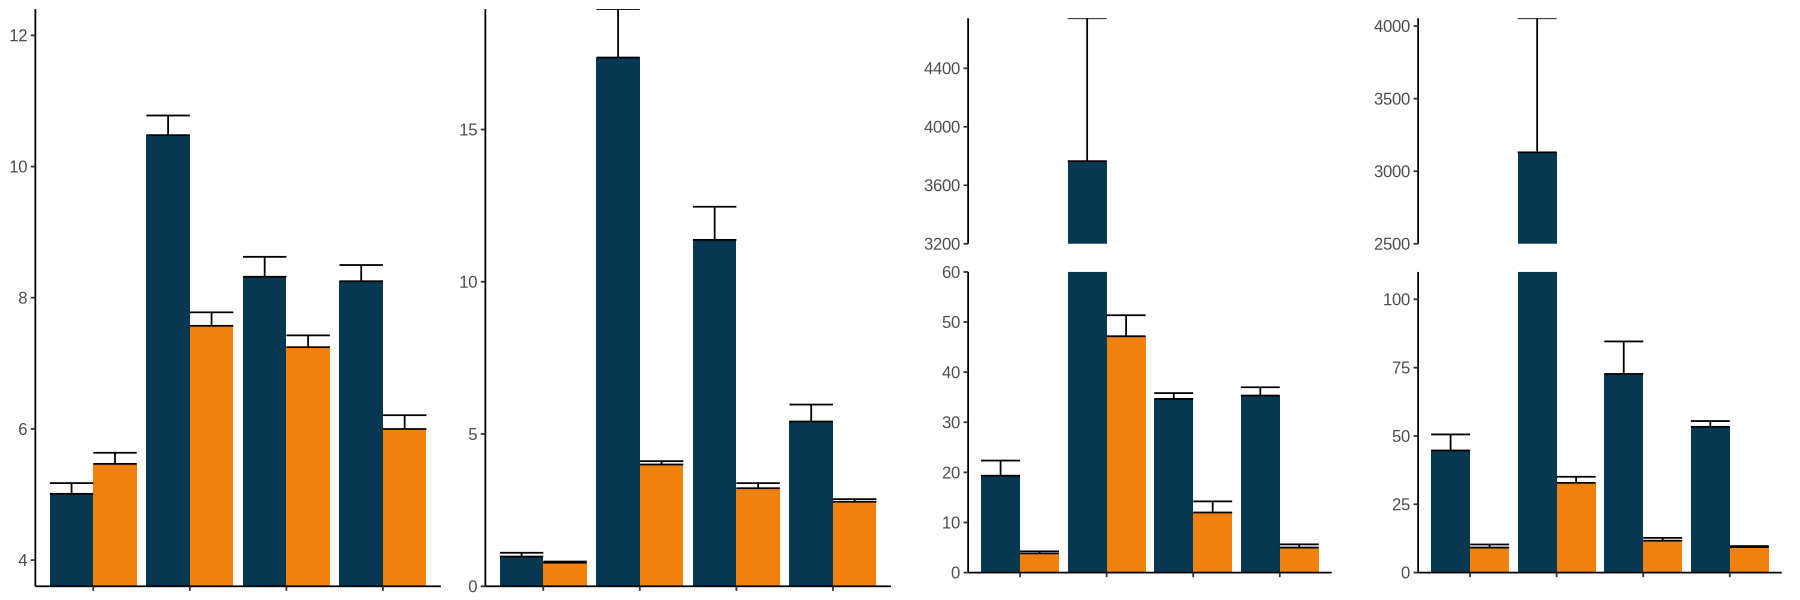

In [21]:
options(repr.plot.width = 15, repr.plot.height = 5)
ggarrange(print(pp_bar), print(cpa_bar), print(alt_bar), print(ast_bar),
          ncol = 4, nrow = 1)

## Wilcoxon testing

In [7]:
metadata_ccl4_cneg_pp <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "Cneg") %>% select(PP)
metadata_ccl4_cneg_cpa <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "Cneg") %>% select(CPA)
metadata_ccl4_cneg_alt <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "Cneg") %>% select(ALT)
metadata_ccl4_cneg_ast <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "Cneg") %>% select(AST)

metadata_ccl4_cpos_pp <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "Cpos") %>% select(PP)
metadata_ccl4_cpos_cpa <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "Cpos") %>% select(CPA)
metadata_ccl4_cpos_alt <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "Cpos") %>% select(ALT)
metadata_ccl4_cpos_ast <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "Cpos") %>% select(AST)

metadata_ccl4_r1_pp <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "R1") %>% select(PP)
metadata_ccl4_r1_cpa <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "R1") %>% select(CPA)
metadata_ccl4_r1_alt <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "R1") %>% select(ALT)
metadata_ccl4_r1_ast <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "R1") %>% select(AST)

metadata_ccl4_r2_pp <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "R2") %>% select(PP)
metadata_ccl4_r2_cpa <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "R2") %>% select(CPA)
metadata_ccl4_r2_alt <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "R2") %>% select(ALT)
metadata_ccl4_r2_ast <- metadata %>% filter(Model == "CCL4") %>% filter(Group == "R2") %>% select(AST)

metadata_taa_cneg_pp <- metadata%>%filter(Model=="TAA")%>%filter(Group=="Cneg")%>%select(PP)
metadata_taa_cneg_cpa <-metadata%>%filter(Model=="TAA")%>%filter(Group=="Cneg")%>%select(CPA)
metadata_taa_cneg_alt <-metadata%>%filter(Model=="TAA")%>%filter(Group=="Cneg")%>%select(ALT)
metadata_taa_cneg_ast <-metadata%>%filter(Model=="TAA")%>%filter(Group=="Cneg")%>%select(AST)

metadata_taa_cpos_pp <-metadata%>%filter(Model=="TAA")%>%filter(Group=="Cpos")%>%select(PP)
metadata_taa_cpos_cpa <-metadata%>%filter(Model=="TAA")%>%filter(Group=="Cpos")%>%select(CPA)
metadata_taa_cpos_alt <-metadata%>%filter(Model=="TAA")%>%filter(Group=="Cpos")%>%select(ALT)
metadata_taa_cpos_ast <-metadata%>%filter(Model=="TAA")%>%filter(Group=="Cpos")%>%select(AST)

metadata_taa_r1_pp <- metadata%>%filter(Model=="TAA")%>%filter(Group=="R1")%>%select(PP)
metadata_taa_r1_cpa <-metadata%>%filter(Model=="TAA")%>%filter(Group=="R1")%>%select(CPA)
metadata_taa_r1_alt <-metadata%>%filter(Model=="TAA")%>%filter(Group=="R1")%>%select(ALT)
metadata_taa_r1_ast <-metadata%>%filter(Model=="TAA")%>%filter(Group=="R1")%>%select(AST)

metadata_taa_r2_pp <- metadata%>%filter(Model=="TAA")%>%filter(Group=="R2")%>%select(PP)
metadata_taa_r2_cpa <-metadata%>%filter(Model=="TAA")%>%filter(Group=="R2")%>%select(CPA)
metadata_taa_r2_alt <-metadata%>%filter(Model=="TAA")%>%filter(Group=="R2")%>%select(ALT)
metadata_taa_r2_ast <-metadata%>%filter(Model=="TAA")%>%filter(Group=="R2")%>%select(AST)

### CCL4

In [9]:
print("PP")
wilcox.test(metadata_ccl4_cpos_pp$PP, metadata_ccl4_cneg_pp$PP, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_ccl4_r1_pp$PP, metadata_ccl4_cpos_pp$PP, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_ccl4_r2_pp$PP, metadata_ccl4_r1_pp$PP, paired = FALSE, alternative = "two.sided")

print("CPA")
wilcox.test(metadata_ccl4_cpos_cpa$CPA, metadata_ccl4_cneg_cpa$CPA, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_ccl4_r1_cpa$CPA, metadata_ccl4_cpos_cpa$CPA, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_ccl4_r2_cpa$CPA, metadata_ccl4_r1_cpa$CPA, paired = FALSE, alternative = "two.sided")

print("ALT")
wilcox.test(metadata_ccl4_cpos_alt$ALT, metadata_ccl4_cneg_alt$ALT, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_ccl4_r1_alt$ALT, metadata_ccl4_cpos_alt$ALT, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_ccl4_r2_alt$ALT, metadata_ccl4_r1_alt$ALT, paired = FALSE, alternative = "two.sided")

print("AST")
wilcox.test(metadata_ccl4_cpos_ast$AST, metadata_ccl4_cneg_ast$AST, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_ccl4_r1_ast$AST, metadata_ccl4_cpos_ast$AST, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_ccl4_r2_ast$AST, metadata_ccl4_r1_ast$AST, paired = FALSE, alternative = "two.sided")

[1] "PP"



	Wilcoxon rank sum exact test

data:  metadata_ccl4_cpos_pp$PP and metadata_ccl4_cneg_pp$PP
W = 36, p-value = 0.002165
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  metadata_ccl4_r1_pp$PP and metadata_ccl4_cpos_pp$PP
W = 1, p-value = 0.004329
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_ccl4_r2_pp$PP, metadata_ccl4_r1_pp$PP, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_ccl4_r2_pp$PP and metadata_ccl4_r1_pp$PP
W = 17.5, p-value = 1
alternative hypothesis: true location shift is not equal to 0


[1] "CPA"



	Wilcoxon rank sum exact test

data:  metadata_ccl4_cpos_cpa$CPA and metadata_ccl4_cneg_cpa$CPA
W = 36, p-value = 0.002165
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  metadata_ccl4_r1_cpa$CPA and metadata_ccl4_cpos_cpa$CPA
W = 4, p-value = 0.02597
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  metadata_ccl4_r2_cpa$CPA and metadata_ccl4_r1_cpa$CPA
W = 0, p-value = 0.002165
alternative hypothesis: true location shift is not equal to 0


[1] "ALT"


Warning message in wilcox.test.default(metadata_ccl4_cpos_alt$ALT, metadata_ccl4_cneg_alt$ALT, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_ccl4_cpos_alt$ALT and metadata_ccl4_cneg_alt$ALT
W = 36, p-value = 0.004772
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_ccl4_r1_alt$ALT, metadata_ccl4_cpos_alt$ALT, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_ccl4_r1_alt$ALT and metadata_ccl4_cpos_alt$ALT
W = 0, p-value = 0.004698
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_ccl4_r2_alt$ALT, metadata_ccl4_r1_alt$ALT, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_ccl4_r2_alt$ALT and metadata_ccl4_r1_alt$ALT
W = 20.5, p-value = 0.7379
alternative hypothesis: true location shift is not equal to 0


[1] "AST"



	Wilcoxon rank sum exact test

data:  metadata_ccl4_cpos_ast$AST and metadata_ccl4_cneg_ast$AST
W = 36, p-value = 0.002165
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_ccl4_r1_ast$AST, metadata_ccl4_cpos_ast$AST, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_ccl4_r1_ast$AST and metadata_ccl4_cpos_ast$AST
W = 1, p-value = 0.008127
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_ccl4_r2_ast$AST, metadata_ccl4_r1_ast$AST, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_ccl4_r2_ast$AST and metadata_ccl4_r1_ast$AST
W = 9.5, p-value = 0.1832
alternative hypothesis: true location shift is not equal to 0


In [105]:
wilcox.test(metadata_ccl4_r2_pp$PP, metadata_ccl4_cpos_pp$PP, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_ccl4_r2_cpa$CPA, metadata_ccl4_cpos_cpa$CPA, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_ccl4_r2_alt$ALT, metadata_ccl4_cpos_alt$ALT, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_ccl4_r2_ast$AST, metadata_ccl4_cpos_ast$AST, paired = FALSE, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  metadata_ccl4_r2_pp$PP and metadata_ccl4_cpos_pp$PP
W = 0, p-value = 0.002165
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  metadata_ccl4_r2_cpa$CPA and metadata_ccl4_cpos_cpa$CPA
W = 0, p-value = 0.002165
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_ccl4_r2_alt$ALT, metadata_ccl4_cpos_alt$ALT, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_ccl4_r2_alt$ALT and metadata_ccl4_cpos_alt$ALT
W = 0, p-value = 0.004922
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_ccl4_r2_ast$AST, metadata_ccl4_cpos_ast$AST, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_ccl4_r2_ast$AST and metadata_ccl4_cpos_ast$AST
W = 0, p-value = 0.004772
alternative hypothesis: true location shift is not equal to 0


### TAA

In [33]:
print("PP")
wilcox.test(metadata_taa_cpos_pp$PP, metadata_taa_cneg_pp$PP, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_taa_r1_pp$PP, metadata_taa_cpos_pp$PP, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_taa_r2_pp$PP, metadata_taa_r1_pp$PP, paired = FALSE, alternative = "two.sided")

print("CPA")
wilcox.test(metadata_taa_cpos_cpa$CPA, metadata_taa_cneg_cpa$CPA, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_taa_r1_cpa$CPA, metadata_taa_cpos_cpa$CPA, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_taa_r2_cpa$CPA, metadata_taa_r1_cpa$CPA, paired = FALSE, alternative = "two.sided")

print("ALT")
wilcox.test(metadata_taa_cpos_alt$ALT, metadata_taa_cneg_alt$ALT, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_taa_r1_alt$ALT, metadata_taa_cpos_alt$ALT, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_taa_r2_alt$ALT, metadata_taa_r1_alt$ALT, paired = FALSE, alternative = "two.sided")

print("AST")
wilcox.test(metadata_taa_cpos_ast$AST, metadata_taa_cneg_ast$AST, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_taa_r1_ast$AST, metadata_taa_cpos_ast$AST, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_taa_r2_ast$AST, metadata_taa_r1_ast$AST, paired = FALSE, alternative = "two.sided")

[1] "PP"



	Wilcoxon rank sum exact test

data:  metadata_taa_cpos_pp$PP and metadata_taa_cneg_pp$PP
W = 36, p-value = 0.002165
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  metadata_taa_r1_pp$PP and metadata_taa_cpos_pp$PP
W = 13, p-value = 0.4848
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  metadata_taa_r2_pp$PP and metadata_taa_r1_pp$PP
W = 1, p-value = 0.004329
alternative hypothesis: true location shift is not equal to 0


[1] "CPA"


Warning message in wilcox.test.default(metadata_taa_cpos_cpa$CPA, metadata_taa_cneg_cpa$CPA, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_taa_cpos_cpa$CPA and metadata_taa_cneg_cpa$CPA
W = 36, p-value = 0.004998
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  metadata_taa_r1_cpa$CPA and metadata_taa_cpos_cpa$CPA
W = 1, p-value = 0.004329
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_taa_r2_cpa$CPA, metadata_taa_r1_cpa$CPA, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_taa_r2_cpa$CPA and metadata_taa_r1_cpa$CPA
W = 7, p-value = 0.09213
alternative hypothesis: true location shift is not equal to 0


[1] "ALT"


Warning message in wilcox.test.default(metadata_taa_cpos_alt$ALT, metadata_taa_cneg_alt$ALT, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_taa_cpos_alt$ALT and metadata_taa_cneg_alt$ALT
W = 36, p-value = 0.004698
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  metadata_taa_r1_alt$ALT and metadata_taa_cpos_alt$ALT
W = 0, p-value = 0.002165
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_taa_r2_alt$ALT, metadata_taa_r1_alt$ALT, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_taa_r2_alt$ALT and metadata_taa_r1_alt$ALT
W = 4, p-value = 0.02977
alternative hypothesis: true location shift is not equal to 0


[1] "AST"


Warning message in wilcox.test.default(metadata_taa_cpos_ast$AST, metadata_taa_cneg_ast$AST, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_taa_cpos_ast$AST and metadata_taa_cneg_ast$AST
W = 36, p-value = 0.004998
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_taa_r1_ast$AST, metadata_taa_cpos_ast$AST, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_taa_r1_ast$AST and metadata_taa_cpos_ast$AST
W = 0, p-value = 0.004998
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_taa_r2_ast$AST, metadata_taa_r1_ast$AST, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_taa_r2_ast$AST and metadata_taa_r1_ast$AST
W = 8, p-value = 0.1242
alternative hypothesis: true location shift is not equal to 0


In [106]:
wilcox.test(metadata_taa_r2_pp$PP, metadata_taa_cpos_pp$PP, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_taa_r2_cpa$CPA, metadata_taa_cpos_cpa$CPA, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_taa_r2_alt$ALT, metadata_taa_cpos_alt$ALT, paired = FALSE, alternative = "two.sided")
wilcox.test(metadata_taa_r2_ast$AST, metadata_taa_cpos_ast$AST, paired = FALSE, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  metadata_taa_r2_pp$PP and metadata_taa_cpos_pp$PP
W = 0, p-value = 0.002165
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_taa_r2_cpa$CPA, metadata_taa_cpos_cpa$CPA, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_taa_r2_cpa$CPA and metadata_taa_cpos_cpa$CPA
W = 0, p-value = 0.004998
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_taa_r2_alt$ALT, metadata_taa_cpos_alt$ALT, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_taa_r2_alt$ALT and metadata_taa_cpos_alt$ALT
W = 0, p-value = 0.004998
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(metadata_taa_r2_ast$AST, metadata_taa_cpos_ast$AST, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  metadata_taa_r2_ast$AST and metadata_taa_cpos_ast$AST
W = 0, p-value = 0.004698
alternative hypothesis: true location shift is not equal to 0


## Outputs

In [ ]:
ggsave("03_outputs/15/f1_c.png", f1_c, width = 180, height = 90, units - "px", device = "png")

In [ ]:
ggsave(filename = "03_outputs/15/p_ast.png", p_ast, width = 60, height = 60, dpi = 600, units = "mm", device = "png")